In [1]:
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [2]:
def function_z(x, y):
    r1 = np.sqrt((0.5 - x) ** 2 + (0.5 - y) ** 2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2) ** 2 + (-y - 0.2) ** 2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    
    z = -(
        2 * (np.exp((r1 / 10) ** 2) - 1) * 30 * np.cos(7 * theta1) +
        (np.exp((r2 / 10) ** 2) - 1) * 30 * np.cos(11 * theta2) +
        0.7 * (x ** 2 + y ** 2)
    )
    
    return (np.max(z) - z) / (np.max(z) - np.min(z))

In [3]:
# first create the x and y coordinates of the points
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

In [4]:
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

In [5]:
x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = function_z(x, y)
levels = np.arange(0.0, 1.0, 0.025)

In [6]:
# now create the Triangulation (Creating a Triangulation without specifying
# the triangles results in the Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# mask off unwanted triangles
triang.set_mask(
    np.hypot(
        x[triang.triangles].mean(axis=1),
        y[triang.triangles].mean(axis=1),
    ) < min_radius
)

In [7]:
# refine data
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_tri_refi = refiner.refine_field(z, subdiv=3)

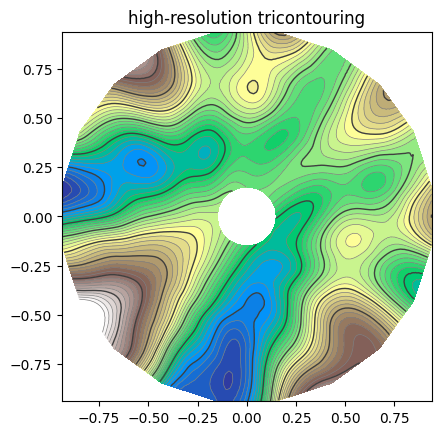

In [8]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

ax.triplot(triang, lw=0.5, color="white")
ax.tricontourf(tri_refi, z_tri_refi, levels=levels, cmap="terrain")
ax.tricontour(
    tri_refi, z_tri_refi, levels=levels,
    colors=["0.25", "0.5", "0.5", "0.5", "0.5"],
    linewidths=[1.0, 0.5, 0.5, 0.5, 0.5],
)

ax.set_title("high-resolution tricontouring")
plt.show()